In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from scipy.stats import ttest_ind

# plotting modules
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 5, 'ytick.major.width': 1.5, 'ytick.major.size': 4})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
add_df = pd.read_csv("/data6/deepro/ukb_bmi/3_characterization/data/additive_test/lifestyle/train_cohort_pred.csv", dtype={"sample_names": str, "bmi": float, "bmi_pred": float})
combo_info_df = pd.read_csv("/data6/deepro/ukb_bmi/3_characterization/data/combos_in_cohort/lifestyle/train_cohort.csv")

In [3]:
def get_exp_obs(samples, add_df):
    add_df = add_df.loc[add_df.sample_names.isin(samples)]
    return pd.Series({"bmi_pred": add_df.bmi_pred.mean(), "bmi": add_df.bmi.mean()})


combo_add_info = combo_info_df.combo_samples.str.split("|").apply(get_exp_obs, args=(add_df, ))

In [4]:
combo_info_df = pd.concat((combo_info_df, combo_add_info), axis=1)

/tmp/ipykernel_11901/3519742240.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
/tmp/ipykernel_11901/3519742240.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)


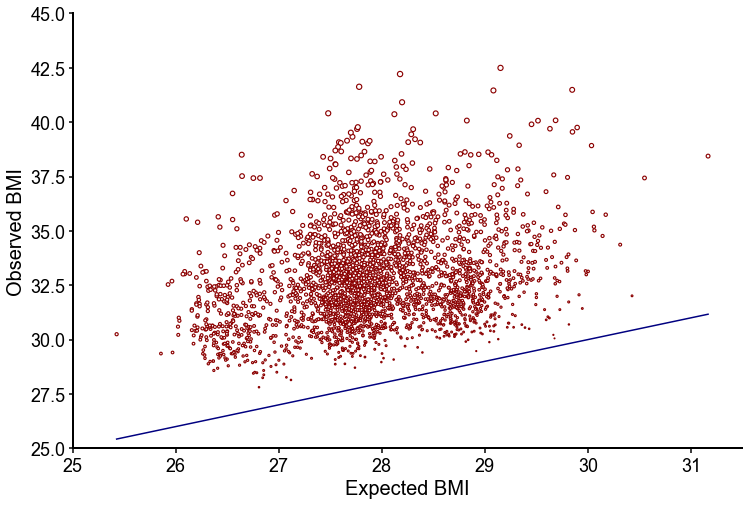

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))

plot_df = combo_info_df

plot_df["sizes"] = (plot_df.bmi - plot_df.bmi_pred).abs()

sns_ax = sns.lineplot(data=plot_df, x="bmi_pred", y="bmi_pred", color="navy", ax=ax)


sns_ax2 = sns.scatterplot(data=plot_df, x="bmi_pred", y="bmi", color="white", ax=ax, s=(plot_df.sizes)*2, ec="darkred", linewidth=1.15)

ax.set_xlim((25, 31.5))
ax.set_ylim((25, 45))

ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)
ax.set_xlabel("Expected BMI", fontsize=20)
ax.set_ylabel("Observed BMI", fontsize=20)
# Remove Spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);



In [6]:
ttest_ind(add_df.bmi, add_df.bmi_pred, alternative="greater", equal_var=False)

TtestResult(statistic=82.53882403485427, pvalue=0.0, df=22220.823569763947)

In [7]:
combo_info_df

,uniq_items,combo_samples,combo_samples_bmi,combo_samples_bmi_prs,mean_bmi,mean_bmi_prs,bmi_pred,bmi,sizes
0,Input_CPT1B|Input_meat|Input_poultry,1898240|1972897|2645945|3675520|4038186|414156...,34.6159|33.9288|30.3405|37.5687|21.014|31.1319...,0.5023|-0.8418|0.0281|-0.683|0.4127|-0.5849|-0...,31.156130,-0.101350,28.391252,31.156130,2.764878
1,Input_CPT1B|Input_WFS1|Input_met,2429334|2633155|2845611|3146689|3702268|376489...,36.7578|34.4962|25.3462|32.0783|34.6148|33.497...,0.1725|0.0834|-0.4039|-0.0799|0.4556|1.0584|-1...,31.063215,-0.555423,28.016805,31.063215,3.046410
2,Input_CPT1B|Input_SLC12A1|Input_met,1207567|1467775|2023338|3173803|3888843|420286...,34.1765|30.0045|32.0461|34.9061|30.7557|31.678...,0.4099|-0.418|0.4916|0.4914|-0.9451|0.1484|1.3834,33.195386,0.223086,27.100005,33.195379,6.095374
3,Input_SHC2|Input_met|Input_sedentary,1436582|1514681|1839502|1937788|2383697|241339...,40.5784|27.9294|34.2212|34.4897|29.3338|39.062...,-0.7351|0.5722|1.3565|-1.3524|-1.1026|1.3282|0...,32.356168,0.056341,28.893206,32.356168,3.462962
4,Input_ABCB9|Input_THBS3|Input_met,1033583|1929187|2033187|4185493|4774186|489339...,31.3938|46.2503|33.9672|30.1516|24.0882|35.876...,-1.009|0.2727|0.2608|-0.5076|-0.8151|0.6057|2....,37.705429,0.156314,27.887377,37.705429,9.818052
...,...,...,...,...,...,...,...,...,...
2758,Input_PLEKHH2|Input_TTN|Input_alcohol|Input_met,2360206|3715438|3868959|4389028|4665978|479731...,32.4349|24.5351|33.6793|29.8316|41.45|30.5571|...,-1.7752|-1.4554|0.9164|0.9457|2.4461|-0.9428|0...,30.627300,0.023882,26.759943,30.627300,3.867357
2759,Input_GNPTAB|Input_MYO7A|Input_alcohol|Input_met,2286873|3012215|3141227|3205278|4597881,31.7195|32.4032|31.6397|30.7621|31.0228,-0.4638|-1.4101|-0.1165|0.1128|-1.4307,31.509460,-0.661660,27.271898,31.509470,4.237572
2760,Input_KRT32|Input_alcohol|Input_met|Input_sede...,2418307|2980086|4651418|4939727|5234339|5695718,38.3883|31.7688|31.2072|33.3388|30.6706|29.0123,1.6|0.758|-2.7864|-0.686|-2.1963|-2.8927,32.397667,-1.033900,28.567668,32.397667,3.829999
2761,Input_BRIP1|Input_alcohol|Input_met|Input_sede...,1447769|1810612|2616847|3012215|4447269|4654107,37.6264|37.5371|31.4789|32.4032|30.6148|27.8539,-0.8202|-0.272|-1.8477|-1.4101|-1.0566|-1.7167,32.919050,-1.187217,28.893405,32.919050,4.025645


In [8]:
combo_info_df = pd.concat((combo_info_df, combo_info_df.uniq_items.str.split("|", expand=True).rename(columns={0: "Gene1", 1: "Gene2", 2: "Gene3", 3: "Gene4"})), axis=1)

In [9]:
combo_info_df

,uniq_items,combo_samples,combo_samples_bmi,combo_samples_bmi_prs,mean_bmi,mean_bmi_prs,bmi_pred,bmi,sizes,Gene1,Gene2,Gene3,Gene4
0,Input_CPT1B|Input_meat|Input_poultry,1898240|1972897|2645945|3675520|4038186|414156...,34.6159|33.9288|30.3405|37.5687|21.014|31.1319...,0.5023|-0.8418|0.0281|-0.683|0.4127|-0.5849|-0...,31.156130,-0.101350,28.391252,31.156130,2.764878,Input_CPT1B,Input_meat,Input_poultry,None
1,Input_CPT1B|Input_WFS1|Input_met,2429334|2633155|2845611|3146689|3702268|376489...,36.7578|34.4962|25.3462|32.0783|34.6148|33.497...,0.1725|0.0834|-0.4039|-0.0799|0.4556|1.0584|-1...,31.063215,-0.555423,28.016805,31.063215,3.046410,Input_CPT1B,Input_WFS1,Input_met,None
2,Input_CPT1B|Input_SLC12A1|Input_met,1207567|1467775|2023338|3173803|3888843|420286...,34.1765|30.0045|32.0461|34.9061|30.7557|31.678...,0.4099|-0.418|0.4916|0.4914|-0.9451|0.1484|1.3834,33.195386,0.223086,27.100005,33.195379,6.095374,Input_CPT1B,Input_SLC12A1,Input_met,None
3,Input_SHC2|Input_met|Input_sedentary,1436582|1514681|1839502|1937788|2383697|241339...,40.5784|27.9294|34.2212|34.4897|29.3338|39.062...,-0.7351|0.5722|1.3565|-1.3524|-1.1026|1.3282|0...,32.356168,0.056341,28.893206,32.356168,3.462962,Input_SHC2,Input_met,Input_sedentary,None
4,Input_ABCB9|Input_THBS3|Input_met,1033583|1929187|2033187|4185493|4774186|489339...,31.3938|46.2503|33.9672|30.1516|24.0882|35.876...,-1.009|0.2727|0.2608|-0.5076|-0.8151|0.6057|2....,37.705429,0.156314,27.887377,37.705429,9.818052,Input_ABCB9,Input_THBS3,Input_met,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2758,Input_PLEKHH2|Input_TTN|Input_alcohol|Input_met,2360206|3715438|3868959|4389028|4665978|479731...,32.4349|24.5351|33.6793|29.8316|41.45|30.5571|...,-1.7752|-1.4554|0.9164|0.9457|2.4461|-0.9428|0...,30.627300,0.023882,26.759943,30.627300,3.867357,Input_PLEKHH2,Input_TTN,Input_alcohol,Input_met
2759,Input_GNPTAB|Input_MYO7A|Input_alcohol|Input_met,2286873|3012215|3141227|3205278|4597881,31.7195|32.4032|31.6397|30.7621|31.0228,-0.4638|-1.4101|-0.1165|0.1128|-1.4307,31.509460,-0.661660,27.271898,31.509470,4.237572,Input_GNPTAB,Input_MYO7A,Input_alcohol,Input_met
2760,Input_KRT32|Input_alcohol|Input_met|Input_sede...,2418307|2980086|4651418|4939727|5234339|5695718,38.3883|31.7688|31.2072|33.3388|30.6706|29.0123,1.6|0.758|-2.7864|-0.686|-2.1963|-2.8927,32.397667,-1.033900,28.567668,32.397667,3.829999,Input_KRT32,Input_alcohol,Input_met,Input_sedentary
2761,Input_BRIP1|Input_alcohol|Input_met|Input_sede...,1447769|1810612|2616847|3012215|4447269|4654107,37.6264|37.5371|31.4789|32.4032|30.6148|27.8539,-0.8202|-0.272|-1.8477|-1.4101|-1.0566|-1.7167,32.919050,-1.187217,28.893405,32.919050,4.025645,Input_BRIP1,Input_alcohol,Input_met,Input_sedentary


In [10]:
combo_info_df_mini = combo_info_df.sort_values("sizes", ascending=False).head(10)

In [11]:
combo_info_df_mini

,uniq_items,combo_samples,combo_samples_bmi,combo_samples_bmi_prs,mean_bmi,mean_bmi_prs,bmi_pred,bmi,sizes,Gene1,Gene2,Gene3,Gene4
278,Input_CAD|Input_STOML1|Input_met,1351963|3292085|3388991|3635959|3809715,40.7777|59.4499|34.0866|39.2308|37.5144,0.6681|-0.6427|1.4166|0.5442|0.405,42.211880,0.478240,28.176612,42.211880,14.035268,Input_CAD,Input_STOML1,Input_met,None
1723,Input_ME1|Input_MYH2|Input_met,1060844|1187598|1300917|1529984|2180516|3799657,42.2052|41.6652|67.3828|35.727|35.643|27.1349,0.8556|0.5223|1.9562|0.2347|-1.5269|-0.8836,41.626350,0.193050,27.779623,41.626356,13.846733,Input_ME1,Input_MYH2,Input_met,None
1825,Input_AGXT|Input_bread|Input_sleep,1646629|2067813|3616898|4472044|4632644|4836777,53.794|27.2151|57.4047|33.8026|34.0649|48.6876,0.2927|-0.2533|1.3557|-0.4618|-0.476|1.7927,42.494817,0.375000,29.151651,42.494817,13.343165,Input_AGXT,Input_bread,Input_sleep,None
2152,Input_LAMA2|Input_MATN2|Input_met,1494826|1574823|2838310|5373956|5477365|5769190,32.6652|34.0472|61.708|60.5536|31.0804|22.3875,-1.2731|1.3509|-0.3385|0.0036|-0.2138|-2.0916,40.406983,-0.427083,27.479185,40.406983,12.927798,Input_LAMA2,Input_MATN2,Input_met,None
598,Input_MICAL1|Input_MYO3B|Input_met,2840640|2979286|4845011|5635057|5797514,34.009|43.0041|40.7331|38.6352|48.1928,-0.9482|-0.5288|-1.1883|1.1565|0.1305,40.914840,-0.275660,28.196105,40.914850,12.718745,Input_MICAL1,Input_MYO3B,Input_met,None
1351,Input_PHKA1|Input_WFS1|Input_sleep,1052650|2182397|2682570|2940150|4019760,42.5524|45.6945|29.3367|47.8138|41.89,0.4001|0.6631|-1.1737|-1.1173|-0.7048,41.457480,-0.386520,29.082795,41.457480,12.374685,Input_PHKA1,Input_WFS1,Input_sleep,None
2101,Input_KCNJ14|Input_KRT35|Input_met,1521703|1877905|5271039|5431377|5698808,44.586|44.6742|31.4062|36.6437|44.5128,0.7349|0.8631|-0.3036|-0.7937|0.8705,40.364580,0.274240,28.121508,40.364580,12.243072,Input_KCNJ14,Input_KRT35,Input_met,None
966,Input_JAG1|Input_MYO1G|Input_met,1505291|1538757|3469045|3848878|4958066|5914609,37.6843|37.4985|44.6356|56.7677|30.2628|31.7718,-0.1258|0.188|1.871|1.859|-0.5571|0.0114,39.770117,0.541083,27.766665,39.770117,12.003451,Input_JAG1,Input_MYO1G,Input_met,None
494,Input_ABCC10|Input_INPP5B|Input_sedentary,2425985|2563917|2641245|3772248|4028349,58.9246|32.1124|35.748|33.3108|38.3347,0.3046|0.1792|0.38|-0.5051|1.0034,39.686100,0.272420,27.759628,39.686100,11.926472,Input_ABCC10,Input_INPP5B,Input_sedentary,None
2571,Input_DNAJC5|Input_met|Input_sedentary,1320028|1466424|1707845|2526739|2545634|356780...,36.751|24.6947|32.2779|60.8595|29.4724|57.66|3...,1.4471|-0.4022|0.3457|0.8688|-0.156|0.4034|0.5...,40.403050,0.476938,28.522712,40.403050,11.880338,Input_DNAJC5,Input_met,Input_sedentary,None


In [12]:
all_genes = "|".join(combo_info_df.uniq_items).split("|")

In [13]:
gene_count_dict = Counter(all_genes)

In [14]:
gene_count_dict = Counter(all_genes)

In [15]:
topn = 15

In [16]:
def find_best_factor_for_heatmap(num):
    factors = []
    for i in range(1, int(num**0.5)+1):
        if num%i==0:
            possible_factors = tuple(sorted([i, num//i]))
            if possible_factors[1]/possible_factors[0]<5:
                factors.append(possible_factors)
    return sorted(factors, key=lambda x: abs(2-(x[1]/x[0])))[0]


In [17]:
values_in_arr = topn**2

In [18]:
heatmap_layout = find_best_factor_for_heatmap(values_in_arr)

In [19]:
heatmap_layout

(9, 25)

In [20]:
combo_info_df_mini = combo_info_df.sort_values("sizes", ascending=False).head(topn)

In [21]:
gene_count_dict = Counter("|".join(combo_info_df_mini.uniq_items).split("|"))

In [22]:
xset = set()
yset = set()
zset = set()


myarr = np.zeros(heatmap_layout)
sorted_genes = [g[0] for g in gene_count_dict.most_common()]

for df_values in combo_info_df_mini.itertuples():
    genes = df_values.uniq_items.split("|")
    print(genes)
    break

['Input_CAD', 'Input_STOML1', 'Input_met']


In [23]:
gene_count_dict["Input_MADD"]

0

In [24]:
myarr

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [25]:
sorted(gene_count_dict.values())[::-1]

[9,
 3,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [26]:
combo_info_df_mini

,uniq_items,combo_samples,combo_samples_bmi,combo_samples_bmi_prs,mean_bmi,mean_bmi_prs,bmi_pred,bmi,sizes,Gene1,Gene2,Gene3,Gene4
278,Input_CAD|Input_STOML1|Input_met,1351963|3292085|3388991|3635959|3809715,40.7777|59.4499|34.0866|39.2308|37.5144,0.6681|-0.6427|1.4166|0.5442|0.405,42.211880,0.478240,28.176612,42.211880,14.035268,Input_CAD,Input_STOML1,Input_met,None
1723,Input_ME1|Input_MYH2|Input_met,1060844|1187598|1300917|1529984|2180516|3799657,42.2052|41.6652|67.3828|35.727|35.643|27.1349,0.8556|0.5223|1.9562|0.2347|-1.5269|-0.8836,41.626350,0.193050,27.779623,41.626356,13.846733,Input_ME1,Input_MYH2,Input_met,None
1825,Input_AGXT|Input_bread|Input_sleep,1646629|2067813|3616898|4472044|4632644|4836777,53.794|27.2151|57.4047|33.8026|34.0649|48.6876,0.2927|-0.2533|1.3557|-0.4618|-0.476|1.7927,42.494817,0.375000,29.151651,42.494817,13.343165,Input_AGXT,Input_bread,Input_sleep,None
2152,Input_LAMA2|Input_MATN2|Input_met,1494826|1574823|2838310|5373956|5477365|5769190,32.6652|34.0472|61.708|60.5536|31.0804|22.3875,-1.2731|1.3509|-0.3385|0.0036|-0.2138|-2.0916,40.406983,-0.427083,27.479185,40.406983,12.927798,Input_LAMA2,Input_MATN2,Input_met,None
598,Input_MICAL1|Input_MYO3B|Input_met,2840640|2979286|4845011|5635057|5797514,34.009|43.0041|40.7331|38.6352|48.1928,-0.9482|-0.5288|-1.1883|1.1565|0.1305,40.914840,-0.275660,28.196105,40.914850,12.718745,Input_MICAL1,Input_MYO3B,Input_met,None
1351,Input_PHKA1|Input_WFS1|Input_sleep,1052650|2182397|2682570|2940150|4019760,42.5524|45.6945|29.3367|47.8138|41.89,0.4001|0.6631|-1.1737|-1.1173|-0.7048,41.457480,-0.386520,29.082795,41.457480,12.374685,Input_PHKA1,Input_WFS1,Input_sleep,None
2101,Input_KCNJ14|Input_KRT35|Input_met,1521703|1877905|5271039|5431377|5698808,44.586|44.6742|31.4062|36.6437|44.5128,0.7349|0.8631|-0.3036|-0.7937|0.8705,40.364580,0.274240,28.121508,40.364580,12.243072,Input_KCNJ14,Input_KRT35,Input_met,None
966,Input_JAG1|Input_MYO1G|Input_met,1505291|1538757|3469045|3848878|4958066|5914609,37.6843|37.4985|44.6356|56.7677|30.2628|31.7718,-0.1258|0.188|1.871|1.859|-0.5571|0.0114,39.770117,0.541083,27.766665,39.770117,12.003451,Input_JAG1,Input_MYO1G,Input_met,None
494,Input_ABCC10|Input_INPP5B|Input_sedentary,2425985|2563917|2641245|3772248|4028349,58.9246|32.1124|35.748|33.3108|38.3347,0.3046|0.1792|0.38|-0.5051|1.0034,39.686100,0.272420,27.759628,39.686100,11.926472,Input_ABCC10,Input_INPP5B,Input_sedentary,None
2571,Input_DNAJC5|Input_met|Input_sedentary,1320028|1466424|1707845|2526739|2545634|356780...,36.751|24.6947|32.2779|60.8595|29.4724|57.66|3...,1.4471|-0.4022|0.3457|0.8688|-0.156|0.4034|0.5...,40.403050,0.476938,28.522712,40.403050,11.880338,Input_DNAJC5,Input_met,Input_sedentary,None


In [27]:
combo_info_df.sort_values("sizes", ascending=False)

,uniq_items,combo_samples,combo_samples_bmi,combo_samples_bmi_prs,mean_bmi,mean_bmi_prs,bmi_pred,bmi,sizes,Gene1,Gene2,Gene3,Gene4
278,Input_CAD|Input_STOML1|Input_met,1351963|3292085|3388991|3635959|3809715,40.7777|59.4499|34.0866|39.2308|37.5144,0.6681|-0.6427|1.4166|0.5442|0.405,42.211880,0.478240,28.176612,42.211880,14.035268,Input_CAD,Input_STOML1,Input_met,None
1723,Input_ME1|Input_MYH2|Input_met,1060844|1187598|1300917|1529984|2180516|3799657,42.2052|41.6652|67.3828|35.727|35.643|27.1349,0.8556|0.5223|1.9562|0.2347|-1.5269|-0.8836,41.626350,0.193050,27.779623,41.626356,13.846733,Input_ME1,Input_MYH2,Input_met,None
1825,Input_AGXT|Input_bread|Input_sleep,1646629|2067813|3616898|4472044|4632644|4836777,53.794|27.2151|57.4047|33.8026|34.0649|48.6876,0.2927|-0.2533|1.3557|-0.4618|-0.476|1.7927,42.494817,0.375000,29.151651,42.494817,13.343165,Input_AGXT,Input_bread,Input_sleep,None
2152,Input_LAMA2|Input_MATN2|Input_met,1494826|1574823|2838310|5373956|5477365|5769190,32.6652|34.0472|61.708|60.5536|31.0804|22.3875,-1.2731|1.3509|-0.3385|0.0036|-0.2138|-2.0916,40.406983,-0.427083,27.479185,40.406983,12.927798,Input_LAMA2,Input_MATN2,Input_met,None
598,Input_MICAL1|Input_MYO3B|Input_met,2840640|2979286|4845011|5635057|5797514,34.009|43.0041|40.7331|38.6352|48.1928,-0.9482|-0.5288|-1.1883|1.1565|0.1305,40.914840,-0.275660,28.196105,40.914850,12.718745,Input_MICAL1,Input_MYO3B,Input_met,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,Input_PKHD1L1|Input_sedentary|Input_sleep,1496996|1729458|1738709|1798819|1940449|195896...,26.8761|45.4466|27.438|24.9503|24.1238|32.5789...,1.5163|-1.3832|0.3269|-0.0198|-0.2179|0.7875|-...,30.696100,0.043921,29.815572,30.696100,0.880528,Input_PKHD1L1,Input_sedentary,Input_sleep,None
1920,Input_SLC52A2|Input_met|Input_sedentary,1875023|1987659|2284664|2458877|2682217|295093...,29.0437|32.2066|28.153|32.5781|33.7291|27.408|...,1.013|-0.2895|-2.6899|0.0345|0.2522|-0.5842|-1...,29.884020,-0.295385,29.043321,29.884020,0.840699,Input_SLC52A2,Input_met,Input_sedentary,None
912,Input_ABCA6|Input_meat|Input_poultry,1146916|1180465|2094362|2111317|3140469|321000...,27.2812|23.6837|30.2382|27.2002|27.5707|34.906...,-0.8207|1.0161|-0.9754|-0.6001|0.7982|0.6324|-...,29.471300,-0.470855,28.916056,29.471300,0.555244,Input_ABCA6,Input_meat,Input_poultry,None
341,Input_COL11A1|Input_sedentary|Input_sleep,1431716|1581192|1729823|2175018|2465956|275582...,32.5208|32.6538|20.2415|22.3111|26.5338|36.388...,-1.4285|-0.2066|0.1704|-2.4659|0.342|-0.4849|-...,30.216986,-0.195536,29.664668,30.216986,0.552318,Input_COL11A1,Input_sedentary,Input_sleep,None
